# Assignment2
## Anomaly detection 데이터셋을 SVM을 이용해서 판별해보자
### 데이터 분포 : True : 0.17프로 나머지 다 False, Row약 28만행 < 데이터 트레인 시간이 오래걸립니다.(그래도 자고 일어나면 트레이닝 돼있기는 하는정도입니다.!!)
### 여러가지 방법을 사용해서 트레이닝 해보고 결과를 비교해주면됩니다!
### 시간이 없거나 좀 어렵다 하시는 분들은 멘토에게 물어보고 한 가지 방법으로만 구현해도 됩니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('anomaly-detection/creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = data.iloc[:,:-1] # X데이터 분리
y = data.iloc[:,-1] # y데이터 분리

In [5]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [7]:
# class의 불균형함을 확인할수있다.
y.value_counts()

0    284314
1       492
Name: Class, dtype: int64

In [8]:
# scaling 해주자
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# imbalance data 처리방법
> 이러한 비대칭 데이터셋에서는 정확도(accuracy)가 높아도 재현율(recall, 실제 부실을 부실이라고 예측할 확률)이 급격히 작아지는 현상이 발생하게 된다. 

#### 해결방법 

#### 1. under - sampling : 무작위 추출/ 유의미한 데이터만 남기는방식(EasyEnsemble, BalanceCascade)

#### 2. over - sampling : 무작위 추출(데이터를 복제) / 유의정보 (데이터를 복제)


conda install -c conda-forge imbalanced-learn
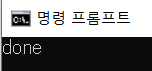

# Over Sampling

In [10]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [11]:
# 모델설정 over sampling
sm = SMOTE(ratio='auto', kind='regular')
#sm = SMOTE(random_state=42)

In [12]:
# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(X_train,list(y_train))

In [13]:
print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, the shape of train_X: (454922, 30)
After OverSampling, the shape of train_y: (454922, 30) 

After OverSampling, counts of label '1': 227461
After OverSampling, counts of label '0': 227461


In [14]:
X_resampled.shape, y_resampled.shape

((454922, 30), (454922,))

In [15]:
y_resampled

array([0, 0, 0, ..., 1, 1, 1])

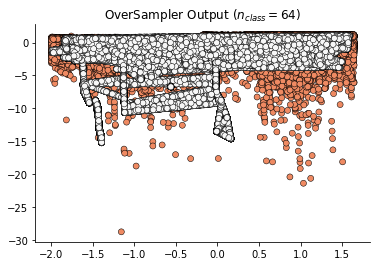

In [16]:
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("OverSampler Output ($n_{class}=64)$")
pass

In [ ]:
from sklearn import metrics #model evaluation하는 라이브러리

svc=SVC(kernel='linear') # 리니어 모델로해보자
svc.fit(X_resampled,y_resampled) # 모델 훈련 중...
y_pred=svc.predict(X_test) # 훈련한 모델로 test셋을 시험해보자

print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

In [ ]:
svc_rbf=SVC(kernel='rbf', gamma = 1) #rbf커널로해보자
svc_rbf.fit(X_train,y_train) # 모델트리이닝
y_pred=svc_rbf.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
from tqdm import tqdm # 이거 중요합니다 for문이 아주 길 때 내가 코드가 잘못돼서 무한루프 도는지 원래 오래걸리는지 for문이 얼마나 남았는지 계산해줍니다.
from sklearn.model_selection import cross_validate
C_range=list(np.arange(1,80,1)) # C값은 1부터 80까지 1간격으로 하자
acc_score = [] # 결과를 보관할 list

#cross validation도 한 번 해보세요
for c in tqdm(C_range): # tqdm쓰는것 간단함! 그냥 원래 쓰는거 앞에 tqdm넣어 주시면 됩니다.abs
    svc = SVC(kernel='rbf', C=c, gamma = 'scale') #gamma에 디포트 값을 scale로 안해주면 워닝어마무시하게 뜹니다 ㅠㅠ
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터


# Under Sampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler

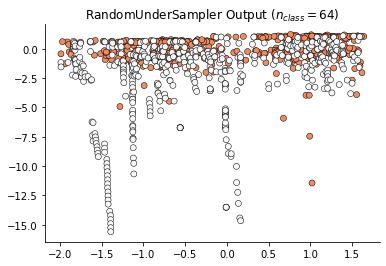

In [18]:
# 모델설정 under sampling
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)

X_resampled, y_resampled = rus.fit_sample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=64)$")
pass

In [19]:
print('After UnderSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After UnderSampling, the shape of train_X: (984, 30)
After UnderSampling, the shape of train_y: (984, 30) 

After UnderSampling, counts of label '1': 492
After UnderSampling, counts of label '0': 492


In [ ]:
from tqdm import tqdm # 이거 중요합니다 for문이 아주 길 때 내가 코드가 잘못돼서 무한루프 도는지 원래 오래걸리는지 for문이 얼마나 남았는지 계산해줍니다.
from sklearn.model_selection import cross_validate
C_range=list(np.arange(1,80,1)) # C값은 1부터 80까지 1간격으로 하자
acc_score = [] # 결과를 보관할 list

#cross validation도 한 번 해보세요
for c in tqdm(C_range): # tqdm쓰는것 간단함! 그냥 원래 쓰는거 앞에 tqdm넣어 주시면 됩니다.abs
    svc = SVC(kernel='rbf', C=c, gamma = 'scale') #gamma에 디포트 값을 scale로 안해주면 워닝어마무시하게 뜹니다 ㅠㅠ
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터


  0%|                                                                                           | 0/79 [00:00<?, ?it/s]